<a href="https://colab.research.google.com/github/YoshitakaNaraoka/gColabNotebooks/blob/main/%E3%82%B1%E3%83%A2%E3%82%A4%E3%83%B3%E3%83%95%E3%82%A9%E7%A0%82%E5%A0%B4%E5%85%BC%E5%82%99%E5%BF%98%E9%8C%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
%pip -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
%pip install -q rdkit rdkit python=latest
import sys
sys.path.append('/usr/local/lib/python/site-packages/')

Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\Users\user\AppData\Local\Programs\Python\Python312\python.exe -m pip <command> [options]

no such option: -c


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'python=latest'
Hint: = is not a valid operator. Did you mean == ?


In [16]:
# rdkitをインストール
%pip install -q -c rdkit rdkit python=latest

# 3D表示のためのpy3Dmolをインストール
%pip install py3Dmol

# mordredのインストール
%pip install mordred

# rdkit内のChemモジュールを読み込む(ここをいったん動かさないと以下のChem.~が動いてくれない)
from rdkit import Chem

Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\Users\user\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  c:\Users\user\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  c:\Users\user\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] [-e] <vcs project url> ...
  c:\Users\user\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] [-e] <local project path> ...
  c:\Users\user\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] <archive url/path> ...

no such option: -y


Note: you may need to restart the kernel to use updated packages.



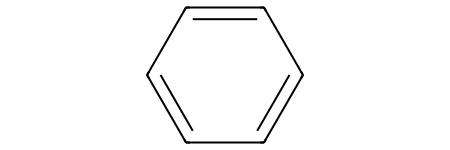

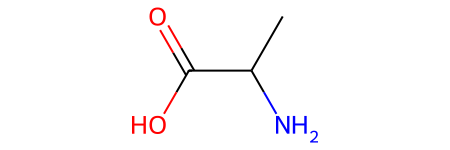

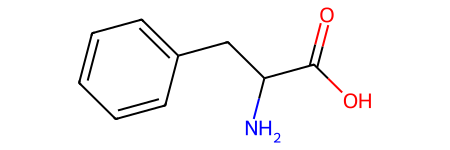

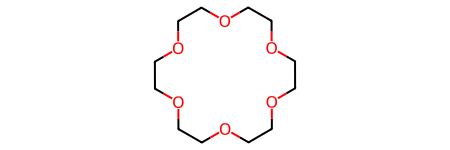

[0.0, 63.31999999999999, 63.31999999999999, 55.38000000000001]


In [36]:
# MolFromSmilesで生成した分子を構造式表示するにはdisplayコマンド
benzene = Chem.MolFromSmiles("c1ccccc1")
alanine = Chem.MolFromSmiles('CC(C(=O)O)N')
phenylalanine = Chem.MolFromSmiles('c1ccccc1CC(C(=O)O)N')
crown = Chem.MolFromSmiles('C1COCCOCCOCCOCCOCCO1')

# CoordGen ライブラリでは大員環化合物を見やすく描画できる
Chem.rdCoordGen.AddCoords(crown)

# TPSA(極性表面積)-細胞膜透過性の指標
from rdkit.Chem import Descriptors
### 分子の用意
mol_list = [benzene,alanine,phenylalanine,crown]
writer=Chem.SDWriter('molecules.sdf')
for mol in mol_list:
	writer.write(mol)
writer.close()
suppl = Chem.SDMolSupplier('molecules.sdf')
mols = [x for x in suppl if x is not None]
len(mols) # 2
### TPSAの計算
declist = Descriptors.descList
calc = {}
for (i,j) in declist:
    calc[i] = j
tpsa = [calc['TPSA'](i) for i in mols]
### 描画
display(mol_list[0])
display(mol_list[1])
display(mol_list[2])
display(mol_list[3])
print(tpsa)
